In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
covid_df = pd.read_csv('data/covid_df.csv', sep=',', decimal='.')

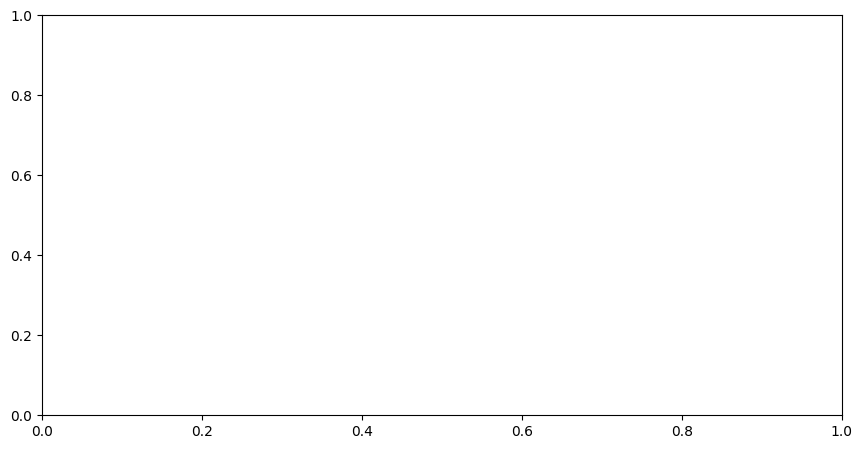

In [15]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

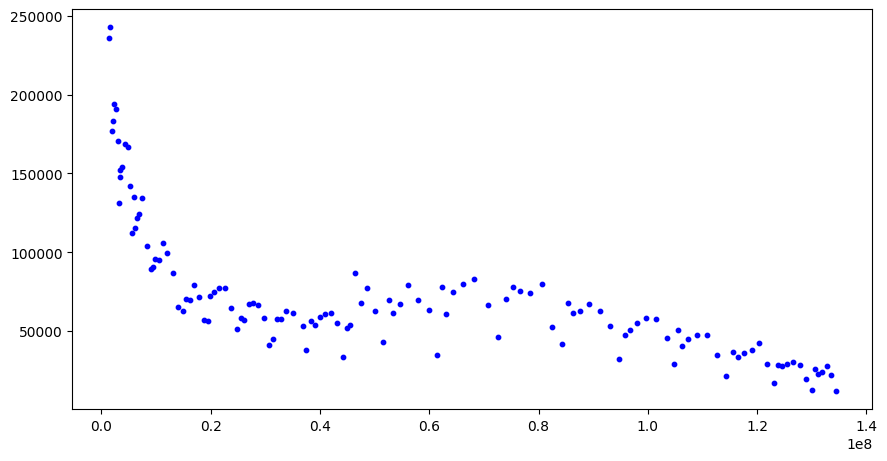

In [24]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=10,
    c='blue',
    marker='o'
)
